<a href="https://colab.research.google.com/github/NoeBaru/CampusS.T.E.M/blob/main/FIFA_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Programma la tua prima rete neurale
    
![640px-Fifa19.png](attachment:640px-Fifa19.png)

<font color="orange" size=5><center>Alessandro Cossard - FIFA19: EDA and Linear Regression </center></font>

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1. Pulizia dei dati

In [146]:
#from google.colab import files

#uploaded = files.upload()

In [147]:
df=pd.read_csv('data.csv')

In [148]:
#from google.colab import files

#uploaded = files.upload()

In [149]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png
...,...,...,...,...,...
GKHandling,11.0,11.0,9.0,85.0,13.0
GKKicking,15.0,15.0,15.0,87.0,5.0
GKPositioning,14.0,14.0,15.0,88.0,10.0
GKReflexes,8.0,11.0,11.0,94.0,13.0


In [150]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


In [152]:
df = df.drop(['Unnamed: 0','Photo','Flag','Club Logo','Loaned From','Release Clause','Joined'],axis=1)

# 2. Analisi esplorativa dei dati (EDA)

In [153]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [154]:
#Analisi sul numero di giocatori
print('Numero di giocatori in ogni nazione :' + '\n' + str(df['Nationality'].value_counts().head(10)))

Numero di giocatori in ogni nazione :
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64


In [155]:
#Analisi sul giocatore
print('Potenziale maggiore : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Miglior performance generale : '+str(df.loc[df['Overall'].idxmax()][1]))

Potenziale maggiore : K. Mbappé
Miglior performance generale : L. Messi


In [156]:
#Adesso stampo il migliore per ogni categoria

cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

i=0
while i < len(cols):
    print('Best {0} : {1}'.format(cols[i],df.loc[df[cols[i]].idxmax()][1]))
    i += 1

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


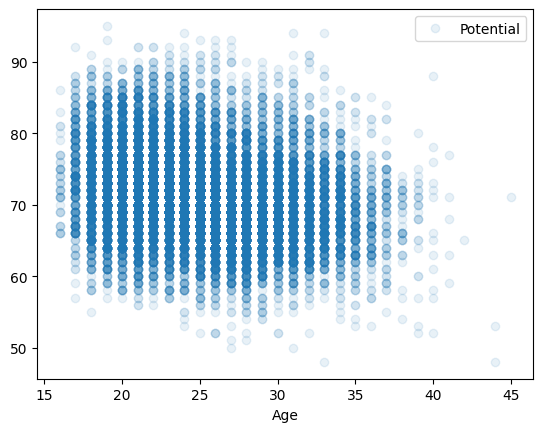

In [157]:
#Il potenziale si abbassa con l'avanzare dell'età
df.plot(x='Age', y='Potential', style='o',alpha=0.1)
plt.show()

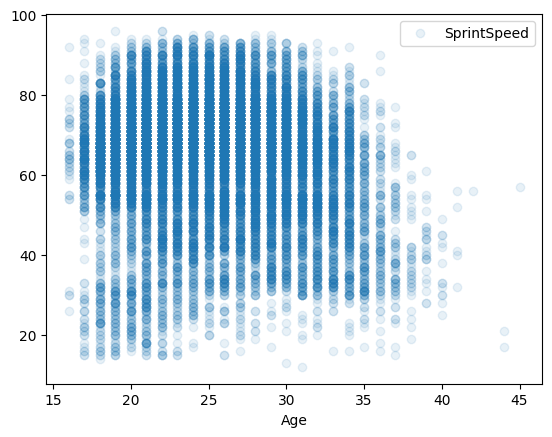

In [158]:
#stessa cosa per la velocità
df.plot(x='Age', y='SprintSpeed', style='o',alpha=0.1)
plt.show()

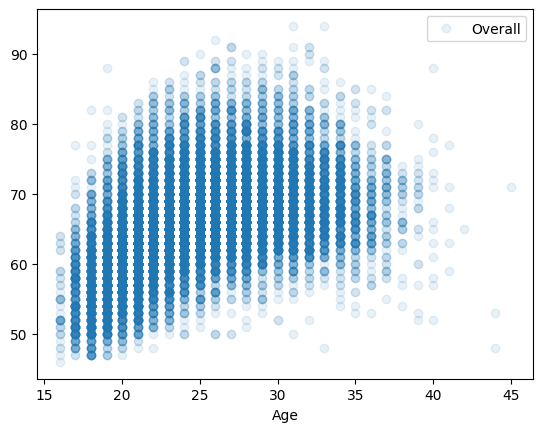

In [159]:
#con l'eta si migliora e poi si peggiora
df.plot(x='Age', y='Overall', style='o',alpha=0.1)
plt.show()

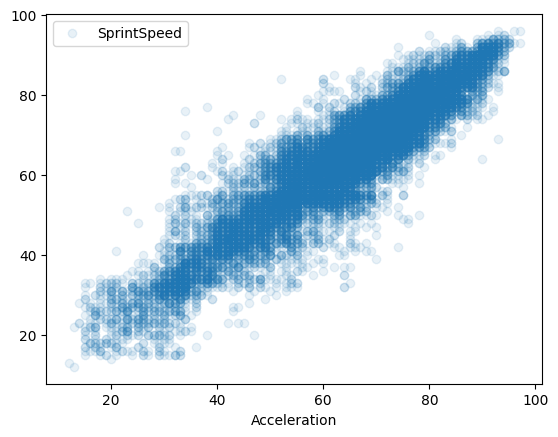

In [160]:
#accelerazione e sprint seguono una relazione lineare
df.plot(x='Acceleration', y='SprintSpeed', style='o',alpha=0.1)
plt.show()

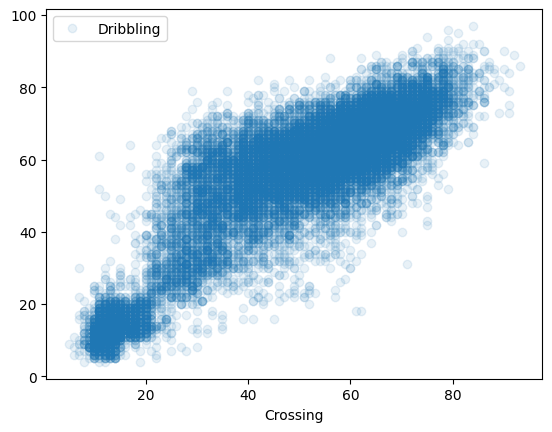

In [161]:
#meno banale che cross e dribling siano lineari
df.plot(x='Crossing', y='Dribbling', style='o',alpha=0.1)
plt.show()

# 3. Modello a due variabili

In [162]:
#x
speed = df['Acceleration']

In [163]:
speed

0        91.0
1        89.0
2        94.0
3        57.0
4        78.0
         ... 
18202    54.0
18203    41.0
18204    70.0
18205    61.0
18206    57.0
Name: Acceleration, Length: 18207, dtype: float64

In [164]:
#y
label = df.Overall

In [165]:
label

0        94
1        94
2        92
3        91
4        91
         ..
18202    47
18203    47
18204    47
18205    47
18206    46
Name: Overall, Length: 18207, dtype: int64

In [166]:
df_t = pd.DataFrame(speed)

In [167]:
df_t

,Acceleration
0,91.0
1,89.0
2,94.0
3,57.0
4,78.0
...,...
18202,54.0
18203,41.0
18204,70.0
18205,61.0


In [168]:
df_t['label'] = label

In [169]:
df_t = df_t.dropna()

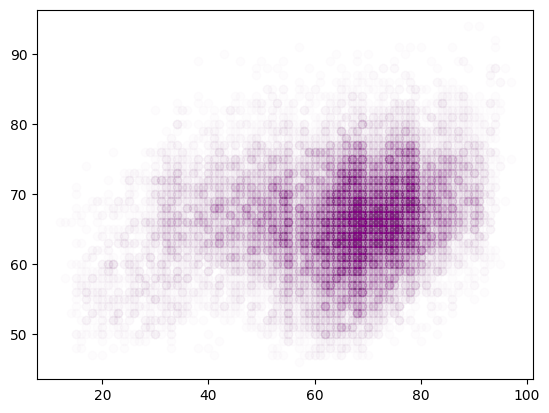

In [170]:
plt.scatter(df_t['Acceleration'], df_t['label'],color='purple',alpha=0.01)
plt.show()

In [171]:
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(df_t['Acceleration'], df_t['label'],
                                                                    test_size=0.2)

In [172]:
#Alleno il modello

model_two = LinearRegression()
#model_two.fit(df_two.array.reshape(-1, 1) , label)
model_two.fit(np.array(X_train_two).reshape(-1,1), y_train_two)
print ('Coefficients = ', model_two.coef_, ', Intercept = ', model_two.intercept_)

Coefficients =  [0.0886651] , Intercept =  60.56510419658517


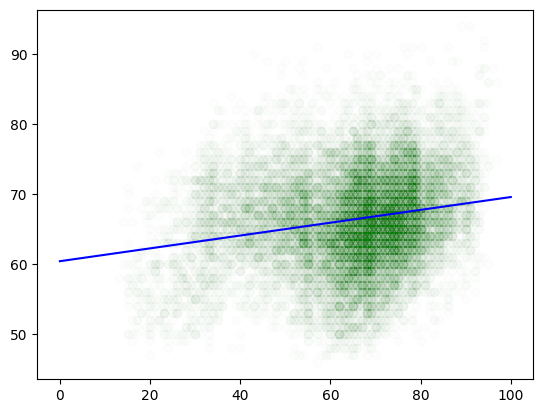

In [173]:
#adesso posso plottarlo
t=np.arange(0, 100, 0.001)

plt.scatter(X_train_two, y_train_two ,color='g',alpha=0.01)
plt.plot (t, t*0.09166291+60.46868291826634,color='b')
plt.show()

In [174]:
pred = model_two.predict(X_test_two.array.reshape(-1, 1))

In [175]:
pred

array([66.06234029, 67.30365167, 66.94899128, ..., 66.41700069,
       67.92430736, 66.86032618])

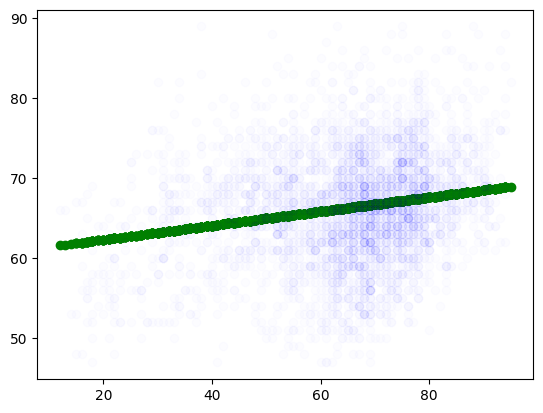

In [176]:
#confronto il predict con le y di test

plt.scatter(X_test_two, pred, color='g')
plt.scatter(X_test_two, y_test_two,  color='blue',alpha=0.01)
plt.show()

#chiaramente quelle verdi saranno tutte sulla retta della predizione
#la differenza tra la predizione e quelle reali è indice di quanto il mio modello performa bene

In [177]:
print('r2 score: '+str(r2_score(y_test_two, pred)))

r2 score: 0.04571419884818351


In [178]:
#il modello perfroma malissimo ma con una solo feature è normale, per questo si usano molti dati
#lo scopo di usare due feature è solo la visualizzazione in 2D

# 4. Modello Multivariato

In [179]:
#rimetto tutti i dati
df=pd.read_csv('data.csv')

In [180]:
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [181]:
#preparo i dati per la regressione lineare
cols_rm = df.columns[28:54]
df = df.drop(cols_rm, axis = 1)
df = df.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df = df.dropna()
df.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [182]:
#assegano un valore numerico al parametro real face
df['Real Face'] = df['Real Face'].apply(lambda x: x.replace('Yes','1'))
df['Real Face'] = df['Real Face'].apply(lambda x: x.replace('No','0'))

In [183]:
#assegano un valore numerico al parametro piede preferito
df['Preferred Foot'] = df['Preferred Foot'].apply(lambda x: x.replace('Right','1'))
df['Preferred Foot'] = df['Preferred Foot'].apply(lambda x: x.replace('Left','0'))

In [184]:
#assegano un valore numerico al parametro nazione piu forte
nationalities = df.Nationality.value_counts()
l_nat = nationalities[nationalities > 250].index.tolist()

for index, row in df.iterrows():
    if df.Nationality[index] in l_nat:
        df.Nationality[index] = 1
    else:
        df.Nationality[index] = 0

<ipython-input-184-7431a580e73a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Nationality[index] = 1
<ipython-input-184-7431a580e73a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Nationality[index] = 0


In [185]:
for index, row in df.iterrows():
    if df['Position'][index] == 'GK':
        df['Position'][index] = 'GK'
    elif ((df['Position'][index] == 'RB') | (df['Position'][index] == 'LB') | (df['Position'][index] == 'CB') | (df['Position'][index] == 'LCB') | (df['Position'][index] == 'RCB') | (df['Position'][index] == 'RWB') | (df['Position'][index] == 'LWB') ):
        df['Position'][index] = 'DF'
    elif ((df['Position'][index] == 'LDM') | (df['Position'][index] == 'CDM') | (df['Position'][index] == 'RDM')):
        df['Position'][index] = 'DM'
    elif ((df['Position'][index] == 'LM') | (df['Position'][index] == 'LCM') | (df['Position'][index] == 'CM') | (df['Position'][index] == 'RCM') | (df['Position'][index] == 'RM')):
        df['Position'][index] = 'MF'
    elif ((df['Position'][index] == 'LAM') | (df['Position'][index] == 'CAM') | (df['Position'][index] == 'RAM') | (df['Position'][index] == 'LW') | (df['Position'][index] == 'RW')):
        df['Position'][index] = 'AM'
    elif ((df['Position'][index] == 'RS') | (df['Position'][index] == 'ST') | (df['Position'] [index]== 'LS') | (df['Position'][index] == 'CF') | (df['Position'][index] == 'LF') | (df['Position'][index] == 'RF')):
        df['Position'][index] = 'ST'

<ipython-input-185-6e463cf60bd4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'][index] = 'ST'
<ipython-input-185-6e463cf60bd4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'][index] = 'AM'
<ipython-input-185-6e463cf60bd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'][index] = 'GK'
<ipython-input-185-6e463cf60bd4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [186]:
#Splitto in due il work rate perchè è doppio
#WR = df["Work Rate"].str.split("/ ", n = 1, expand = True)
#df["Work Rate 1"]= WR[0]
#df["Work Rate 2"]= WR[1]
#df = df.drop('Work Rate', axis = 1)

In [187]:
#l'overall è il target
label = df.Overall
df_feat = df.drop(['Overall'], axis = 1)

In [188]:
label

0        94
1        94
2        92
3        91
4        91
         ..
18202    47
18203    47
18204    47
18205    47
18206    46
Name: Overall, Length: 18147, dtype: int64

In [189]:
#Splitto train e test

X_train, X_test, y_train, y_test = train_test_split(df_feat, label, test_size=0.2)

In [190]:
X_train

,Age,Nationality,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,Position,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
4988,26,1,70,0,1.0,4.0,3.0,Medium/ Low,0,AM,...,71.0,71.0,10.0,47.0,44.0,11.0,10.0,10.0,12.0,14.0
2637,28,0,74,1,1.0,3.0,3.0,High/ Medium,0,DM,...,63.0,62.0,71.0,68.0,67.0,9.0,11.0,7.0,14.0,10.0
1769,21,1,82,1,1.0,3.0,3.0,High/ Medium,0,DF,...,54.0,72.0,68.0,73.0,75.0,9.0,12.0,12.0,13.0,12.0
6207,19,1,78,0,1.0,2.0,3.0,High/ Medium,0,DF,...,42.0,61.0,59.0,71.0,68.0,14.0,8.0,5.0,6.0,9.0
15773,22,1,70,0,1.0,3.0,2.0,Medium/ Medium,0,AM,...,52.0,47.0,35.0,25.0,28.0,7.0,6.0,14.0,7.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,29,1,76,1,2.0,4.0,4.0,Medium/ High,1,MF,...,76.0,81.0,60.0,70.0,71.0,14.0,9.0,7.0,9.0,10.0
10295,25,0,70,1,1.0,4.0,3.0,Medium/ Medium,0,MF,...,45.0,61.0,59.0,54.0,51.0,15.0,15.0,16.0,16.0,10.0
3360,23,1,79,1,1.0,3.0,1.0,Medium/ Medium,0,GK,...,22.0,36.0,15.0,19.0,20.0,78.0,66.0,74.0,62.0,77.0
4768,25,0,72,1,1.0,4.0,3.0,High/ Medium,0,DF,...,62.0,63.0,68.0,65.0,61.0,13.0,13.0,7.0,9.0,13.0


In [191]:
y_train

4988     70
2637     73
1769     75
6207     69
15773    59
         ..
1295     76
10295    65
3360     72
4768     70
4806     70
Name: Overall, Length: 14517, dtype: int64

In [192]:
#uso la funzione dummies per le variabili non numeriche
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

<ipython-input-192-6f2aa1d1aff8>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_train = pd.get_dummies(X_train)
<ipython-input-192-6f2aa1d1aff8>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_test = pd.get_dummies(X_test)


In [193]:
#Applying Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [194]:
#faccio il predict sulle x di test
pred = model.predict(X_test)

#guardo quanto si avvicinano a quelle reali di test
print('r2 score: '+str(r2_score(y_test, pred)))

#r2 si avvicina a 1, ottimo

r2 score: 0.9304330526463853
